In [32]:

import anndata
import pandas as pd
import numpy as np
import scanpy as sc


In [33]:
sc.__version__

'1.9.1'

# Filter out scv2 genes and mt genes

In [34]:

adata = anndata.read('round1_processed.h5ad')


In [35]:
# confirm its raw counts
adata.X[:10].todense()

matrix([[  0.,   0.,   0., ...,   0.,   1.,   1.],
        [  0.,   0.,   0., ...,   1.,   4.,   0.],
        [  0.,   0.,   0., ...,   1.,   1.,   1.],
        ...,
        [  0.,   0.,   0., ...,   0.,   2.,   1.],
        [  0.,   0.,   0., ...,   0.,   2.,   0.],
        [  0.,   0.,   0., ...,   1., 112., 118.]], dtype=float32)

In [36]:
# filter out scv2 genes
adata.var['is_sars2_gene'] = [True if v.startswith('SARS2_') else False for v in adata.var_names]
adata = adata[:, adata.var['is_sars2_gene']==False].copy()


In [37]:
# filter out mitochondrial genes
adata = adata[:,adata.var['mt']==False].copy()


## Round1 ACE2: Top GO terms of infection condition vs uninfected condition for ACE2


In [38]:

ace2 = adata[adata.obs['condition']=='ACE2'].copy()


In [39]:
ace2

AnnData object with n_obs × n_vars = 17484 × 36588
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [40]:

ace2.obs['infection_gmm_annotated'].value_counts()


Uninfected        9519
No Infection      5835
Low Infection     1486
High Infection     644
Name: infection_gmm_annotated, dtype: int64

In [41]:

sc.pp.normalize_total(ace2, target_sum=1e4)
sc.pp.log1p(ace2)
sc.pp.scale(ace2, max_value=10)



In [42]:

ace2


AnnData object with n_obs × n_vars = 17484 × 36588
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [43]:
ace2.obs['infection'].value_counts()

U    9519
I    7965
Name: infection, dtype: int64

/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


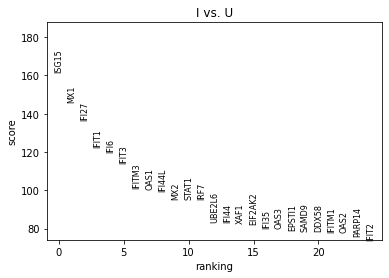

In [44]:
# use this intersection with the IFNs and ISGs from go terms

sc.tl.rank_genes_groups(ace2, 'infection', method='t-test', groups=['I'], reference = 'U')
sc.pl.rank_genes_groups(ace2, n_genes=25, sharey=False)

In [45]:
result = ace2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [46]:
# these are the genes used for Go Enrichment
df['I_n'][:100].values


array(['ISG15', 'MX1', 'IFI27', 'IFIT1', 'IFI6', 'IFIT3', 'IFITM3',
       'OAS1', 'IFI44L', 'MX2', 'STAT1', 'IRF7', 'UBE2L6', 'IFI44',
       'XAF1', 'EIF2AK2', 'IFI35', 'OAS3', 'EPSTI1', 'SAMD9', 'DDX58',
       'IFITM1', 'OAS2', 'PARP14', 'IFIT2', 'RSAD2', 'PLSCR1', 'BST2',
       'TNFSF10', 'LY6E', 'PARP9', 'ISG20', 'SP110', 'OASL', 'USP18',
       'RNF213', 'SP100', 'DDX60', 'IFIH1', 'HELZ2', 'DDX60L', 'IER2',
       'SAMHD1', 'HLA-B', 'SHFL', 'LAP3', 'PSMB9', 'TYMP', 'CMPK2',
       'SAMD9L', 'RTP4', 'NT5C3A', 'HERC5', 'WARS', 'PSMB8', 'STAT2',
       'PML', 'ZNFX1', 'PNPT1', 'ETV7', 'IRF1', 'ADAR', 'PPM1K', 'HLA-C',
       'HERC6', 'SCO2', 'GBP1', 'IRF9', 'RBCK1', 'TAP1', 'TRIM25',
       'IFITM2', 'DTX3L', 'JUN', 'TRIM22', 'PARP12', 'LGALS9', 'IFI16',
       'GBP4', 'TRIM14', 'NMI', 'HSH2D', 'PSME2', 'DNAJA1', 'LGALS3BP',
       'UNC93B1', 'TRIM38', 'APOL6', 'PHF11', 'LAMP3', 'NUB1', 'TNFSF13B',
       'KRT6B', 'N4BP1', 'SLC25A28', 'IFIT5', 'NAPA', 'PMAIP1', 'CXCL10',
       'S

/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


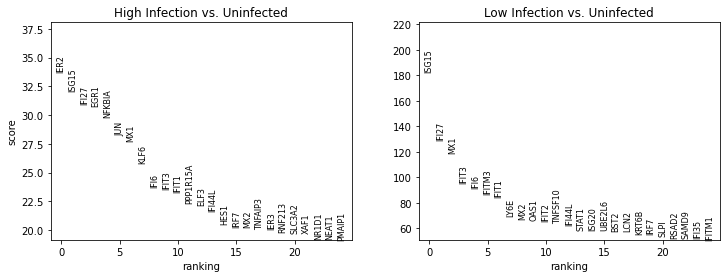

In [14]:
sc.tl.rank_genes_groups(ace2,
                        'infection_gmm_annotated', 
                        method='t-test',
                        groups=['High Infection', 'Low Infection'], 
                        reference = 'Uninfected')

sc.pl.rank_genes_groups(ace2, n_genes=25, sharey=False)

In [15]:
ace2

AnnData object with n_obs × n_vars = 17484 × 36588
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [16]:
result = ace2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [17]:

df['High Infection_n'][:100].values


array(['IER2', 'ISG15', 'IFI27', 'EGR1', 'NFKBIA', 'JUN', 'MX1', 'KLF6',
       'IFI6', 'IFIT3', 'IFIT1', 'PPP1R15A', 'ELF3', 'IFI44L', 'HES1',
       'IRF7', 'MX2', 'TNFAIP3', 'IER3', 'RNF213', 'SLC3A2', 'XAF1',
       'NR1D1', 'NEAT1', 'PMAIP1', 'GADD45A', 'JUNB', 'DDIT3', 'OAS3',
       'IRF1', 'PLAU', 'STAT1', 'OAS1', 'SQSTM1', 'CCNL1', 'DDX58',
       'RSAD2', 'SAMD9', 'ISG20', 'OAS2', 'IFIT2', 'PIM3', 'EIF2AK2',
       'NFKBIZ', 'RND3', 'MTRNR2L8', 'PARP14', 'HNRNPDL', 'IFI35',
       'DUSP1', 'FOSL1', 'EPSTI1', 'BST2', 'AL627171.2', 'ZNFX1',
       'UBE2L6', 'ZC3H12A', 'RSRC2', 'IFI44', 'GADD45B', 'HELZ2', 'GPBP1',
       'CSRNP1', 'IFITM3', 'IFITM1', 'ARRDC3', 'DUSP8', 'N4BP1', 'ZBTB43',
       'PARP9', 'IFIH1', 'HLA-B', 'CXCL1', 'BHLHE41', 'CXCL8', 'USP18',
       'OASL', 'NCOA7', 'CXCL2', 'TNFSF10', 'ABL2', 'PLSCR1', 'TENT5A',
       'SP100', 'MYCBP2', 'DAPP1', 'CFLAR', 'PPM1K', 'RAB3IP', 'CHD2',
       'SP110', 'TYMP', 'ATF3', 'DDX60', 'CXCL3', 'TRIM38', 'KLF5',
       'HIST

In [19]:
high_inf_de_genes = df[['High Infection_n', 'High Infection_p']].values

np.savetxt("7.1_go_analysis_results/round1_ace2only_high_infection_vs_uninfected.csv", high_inf_de_genes, delimiter=',', fmt='%s')

In [20]:
high_inf_de_genes

array([['IER2', 5.233672340753631e-146],
       ['ISG15', 7.285809842400044e-136],
       ['IFI27', 2.711135934730017e-130],
       ...,
       ['SEC61G', 5.448729951032407e-145],
       ['COMT', 2.595962967082026e-151],
       ['NDUFB3', 2.4290561781488093e-200]], dtype=object)

In [21]:
df['High Infection_n'][:100].values

array(['IER2', 'ISG15', 'IFI27', 'EGR1', 'NFKBIA', 'JUN', 'MX1', 'KLF6',
       'IFI6', 'IFIT3', 'IFIT1', 'PPP1R15A', 'ELF3', 'IFI44L', 'HES1',
       'IRF7', 'MX2', 'TNFAIP3', 'IER3', 'RNF213', 'SLC3A2', 'XAF1',
       'NR1D1', 'NEAT1', 'PMAIP1', 'GADD45A', 'JUNB', 'DDIT3', 'OAS3',
       'IRF1', 'PLAU', 'STAT1', 'OAS1', 'SQSTM1', 'CCNL1', 'DDX58',
       'RSAD2', 'SAMD9', 'ISG20', 'OAS2', 'IFIT2', 'PIM3', 'EIF2AK2',
       'NFKBIZ', 'RND3', 'MTRNR2L8', 'PARP14', 'HNRNPDL', 'IFI35',
       'DUSP1', 'FOSL1', 'EPSTI1', 'BST2', 'AL627171.2', 'ZNFX1',
       'UBE2L6', 'ZC3H12A', 'RSRC2', 'IFI44', 'GADD45B', 'HELZ2', 'GPBP1',
       'CSRNP1', 'IFITM3', 'IFITM1', 'ARRDC3', 'DUSP8', 'N4BP1', 'ZBTB43',
       'PARP9', 'IFIH1', 'HLA-B', 'CXCL1', 'BHLHE41', 'CXCL8', 'USP18',
       'OASL', 'NCOA7', 'CXCL2', 'TNFSF10', 'ABL2', 'PLSCR1', 'TENT5A',
       'SP100', 'MYCBP2', 'DAPP1', 'CFLAR', 'PPM1K', 'RAB3IP', 'CHD2',
       'SP110', 'TYMP', 'ATF3', 'DDX60', 'CXCL3', 'TRIM38', 'KLF5',
       'HIST

## Round1 WT: Top GO terms of infection condition vs uninfected condition for ACE2

In [47]:

wt = adata[adata.obs['condition']=='WT'].copy()


In [48]:

sc.pp.normalize_total(wt, target_sum=1e4)
sc.pp.log1p(wt)
sc.pp.scale(wt, max_value=10)



In [49]:
wt

AnnData object with n_obs × n_vars = 10363 × 36588
    obs: 'infection', 'variant', 'condition', 'library_size', 'library_size_log', 'SARS2_genome_ORF1ab_counts', 'SARS2_genome_ORF1ab_log', 'SARS2_genome_S_counts', 'SARS2_genome_S_log', 'SARS2_genome_ORF3a_counts', 'SARS2_genome_ORF3a_log', 'SARS2_genome_E_counts', 'SARS2_genome_E_log', 'SARS2_genome_M_counts', 'SARS2_genome_M_log', 'SARS2_genome_ORF6_counts', 'SARS2_genome_ORF6_log', 'SARS2_genome_ORF7a_counts', 'SARS2_genome_ORF7a_log', 'SARS2_genome_ORF8_counts', 'SARS2_genome_ORF8_log', 'SARS2_genome_N_counts', 'SARS2_genome_N_log', 'SARS2_genome_ORF10_counts', 'SARS2_genome_ORF10_log', 'sars2_total_counts', 'sars2_total_counts_log', 'sars2_lib_size_ratio', 'round', 'condition_variant', 'round_variant_condition', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ts_consensus_prediction', 'ts_consensus_percentage', 'knn_on_bbknn_pred', 'knn_on_scvi_offline_pred', 'scanvi_offline_pred', 'svm_pred', 'rf_pred', 

In [50]:
sc.tl.pca(wt, svd_solver='arpack')


/home/galen/.pyenv/versions/scvi-dev/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


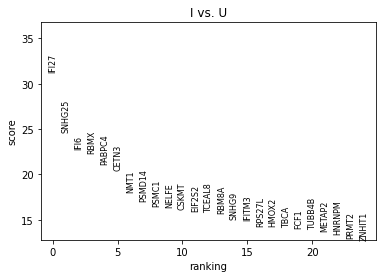

In [51]:
# use this intersection with the IFNs and ISGs from go terms

sc.tl.rank_genes_groups(wt, 'infection', method='t-test', groups=['I'], reference = 'U')
sc.pl.rank_genes_groups(wt, n_genes=25, sharey=False)

In [52]:
result = wt.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [53]:
df

,I_n,I_p
0,IFI27,1.426020e-204
1,SNHG25,7.088876e-131
2,IFI6,1.254694e-112
3,RBMX,5.216847e-108
4,PABPC4,3.222110e-97
...,...,...
36583,PCBP2,6.375936e-17
36584,SOX21,3.215110e-18
36585,GNB2,2.121147e-18
36586,RB1CC1,6.341397e-19


In [54]:
df['I_n'][:100].values

array(['IFI27', 'SNHG25', 'IFI6', 'RBMX', 'PABPC4', 'CETN3', 'NMT1',
       'PSMD14', 'PSMC1', 'NELFE', 'CSKMT', 'EIF2S2', 'TCEAL8', 'RBM8A',
       'SNHG9', 'IFITM3', 'RPS27L', 'HMOX2', 'TBCA', 'FCF1', 'TUBB4B',
       'METAP2', 'HNRNPM', 'PRMT2', 'ZNHIT1', 'NCBP2', 'FAM32A',
       'MTRNR2L1', 'SURF6', 'IER2', 'MRPL1', 'BCCIP', 'RPS10', 'GAPDH',
       'CBX3', 'SFN', 'TECR', 'NUBP1', 'LARP7', 'ISG15', 'TUBA4A',
       'PSME2', 'NDUFB9', 'MCTS1', 'BZW1', 'TUBA1C', 'MPHOSPH6', 'ESRRA',
       'KRT6B', 'PSMC3', 'PDAP1', 'HLA-B', 'RNH1', 'RARS', 'JUNB',
       'TAGLN2', 'PSMD8', 'S100A16', 'GOLGA2', 'EIF6', 'DKC1', 'ATP5ME',
       'ZCCHC10', 'GPX2', 'MRPL12', 'SH3BGRL3', 'PKM', 'POLR2J', 'RAB5C',
       'CAPG', 'AP2B1', 'MVD', 'MTRNR2L6', 'MTRNR2L12', 'NCOA5',
       'SLC25A39', 'NUP85', 'COPE', 'ANXA2', 'EIF4A1', 'NDUFS7',
       'ATP6V0D1', 'ABCF1', 'FDPS', 'IER3', 'TUBB', 'COX5A', 'KRT19',
       'NDUFS2', 'PUF60', 'TIMP1', 'MTRNR2L3', 'CYC1', 'NHP2', 'TALDO1',
       'PSMA2', 'UTP11